# Import section

All necessary imports should be placed here.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Task Implementation

Bifurcations can happen for dynamical systems with state spaces of arbitrary dimension, and also in more
than one parameter. Some bifurcations do not occur if the state space is one-dimensional (and the system is continuous). An important bifurcation for systems with one parameter exists for two-dimensional state spaces: the Andronov-Hopf bifurcation, with the vector field in normal form

$$
\begin{align*}
\dot{x}_1 &= \alpha x_1 - x_2 - x_1(x_1^2 + x_2^2) \\
\dot{x}_2 &= x_1 + \alpha x_2 - x_2(x_1^2 + x_2^2)
\end{align*}
$$


## Constants


In [2]:
w = 3
x2, x1 = np.mgrid[-w:w:100j, -w:w:100j]
starting_points = [(2, 0), (0.5, 0)]
t_span_orbits = (0, 10)
time_step = 0.01

## Methods

In [3]:
def andronov_hopf_bifurcation(t, z, alpha):
    """
    Functions of the Andronov-Hopf bifurcation system.

    The Andronov-Hopf bifurcation is described by the following ordinary differential equations (ODEs):
        dx1/dt = alpha * x1 - x2 - x1 * (x1**2 + x2**2)
        dx2/dt = x1 + alpha * x2 - x2 * (x1**2 + x2**2)

    Parameters:
    - t (float): The current time.
    - z (list): A 2-element list representing the state vector [x1, x2].
    - alpha (float): The bifurcation parameter affecting system behavior.

    Returns:
    - list: A list containing the functions of the Andronov-Hopf bifurcation system.


    Reference:
    - Andronov-Hopf bifurcation: https://en.wikipedia.org/wiki/Hopf_bifurcation
    """
    x1, x2 = z
    dot_x1 = alpha * x1 - x2 - x1 * (x1**2 + x2**2)
    dot_x2 = x1 + alpha * x2 - x2 * (x1**2 + x2**2)
    return [dot_x1, dot_x2]


def euler_method(func, initial_conditions, alpha, t_span, time_step):
    """
    Numerically solves ordinary differential equations (ODEs) using the Euler method.

    Args:
        func (callable): The ODE system to solve. It should take two arguments:
            - t (float): The current time.
            - z (array_like): The current state vector.
            - alpha (float): Additional parameters needed for the ODE system.
        initial_conditions (array_like): The initial state vector.
        alpha (float): Additional parameters needed for the ODE system.
        t_span (tuple): A tuple (t0, t1) representing the initial and final time values.
        time_step (float): Step size for the Euler method.

    Returns:
        tuple: A tuple containing:
            - t_values (numpy.ndarray): Array of time values.
            - x_values (numpy.ndarray): Array of state vectors corresponding to each time point.

    Example:
        ```python
        def example_ode(t, z, alpha):
            x, y = z
            dx_dt = alpha * x - y
            dy_dt = x + alpha * y
            return [dx_dt, dy_dt]

        initial_conditions = [1.0, 0.0]
        alpha_value = 0.5
        time_span = (0, 10)
        time_step = 0.1

        t_values, x_values = euler_method(example_ode, initial_conditions, alpha_value, time_span, time_step)
        ```
    """
    t_values = np.arange(t_span[0], t_span[1] + time_step, time_step)
    x_values = np.zeros((len(t_values), len(initial_conditions)))
    x_values[0, :] = initial_conditions

    for i in range(1, len(t_values)):
        x_values[i, :] = x_values[i - 1, :] + time_step * \
            np.array(func(t_values[i - 1], x_values[i - 1, :], alpha))

    return t_values, x_values


def plot_bifurcation_phase_diagram(alpha):
    """
    Plots the bifurcation phase diagram for a given bifurcation parameter.

    Args:
        alpha (float): Bifurcation alpha parameter.

    Returns:
        None
    """

    fig, axs = plt.subplots(1, len(alpha), figsize=(15, 5))

    for i, alpha in enumerate(alpha):
        U = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
        V = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))

        axs[i].set_xlabel('x1')
        axs[i].set_ylabel('x2')
        axs[i].set_title(f'Bifurcation Diagram at α = {alpha}')
        axs[i].streamplot(x1, x2, U, V, density=1.5)

## Visualization


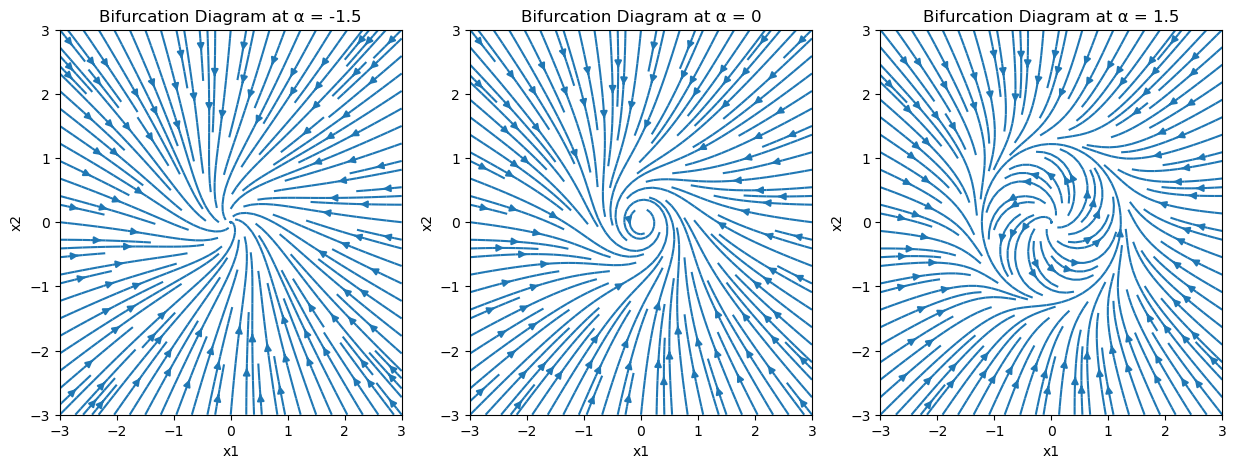

In [4]:
plot_bifurcation_phase_diagram([-1.5, 0, 1.5])

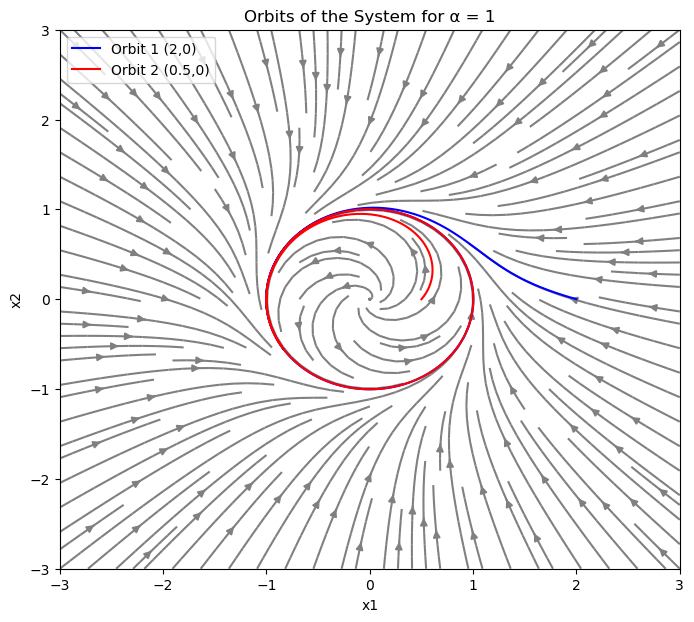

In [5]:
U = 1 * x1 - x2 - x1*(np.square(x1) + np.square(x2))
V = x1 + 1 * x2 - x2*(np.square(x1) + np.square(x2))

plt.figure(figsize=(8, 7))
plt.streamplot(x1, x2, U, V, density=1.5, color="grey")

t_values_1, x_values_1 = euler_method(
    andronov_hopf_bifurcation, starting_points[0], 1, t_span_orbits, time_step)
t_values_2, x_values_2 = euler_method(
    andronov_hopf_bifurcation, starting_points[1], 1, t_span_orbits, time_step)

plt.plot(x_values_1[:, 0], x_values_1[:, 1],
         label='Orbit 1 (2,0)', color='blue')
plt.plot(x_values_2[:, 0], x_values_2[:, 1],
         label='Orbit 2 (0.5,0)', color='red')


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Orbits of the System for α = 1')
plt.legend()
plt.show()